train_accuracy=0.09751666666666667 test_accuracy=0.0974
train_accuracy=0.11236666666666667 test_accuracy=0.1135
train_accuracy=0.09871666666666666 test_accuracy=0.098
train_accuracy=0.10218333333333333 test_accuracy=0.101
train_accuracy=0.10441666666666667 test_accuracy=0.1028
train_accuracy=0.16688333333333333 test_accuracy=0.1676
train_accuracy=0.3909 test_accuracy=0.3955
train_accuracy=0.5605 test_accuracy=0.5618
train_accuracy=0.6758833333333333 test_accuracy=0.6761
train_accuracy=0.7918333333333333 test_accuracy=0.7972
train_accuracy=0.8371666666666666 test_accuracy=0.8406
train_accuracy=0.8562 test_accuracy=0.861
train_accuracy=0.87135 test_accuracy=0.8747
train_accuracy=0.8851666666666667 test_accuracy=0.8883
train_accuracy=0.8949833333333334 test_accuracy=0.8953
train_accuracy=0.9019166666666667 test_accuracy=0.9033
train_accuracy=0.9105833333333333 test_accuracy=0.9101


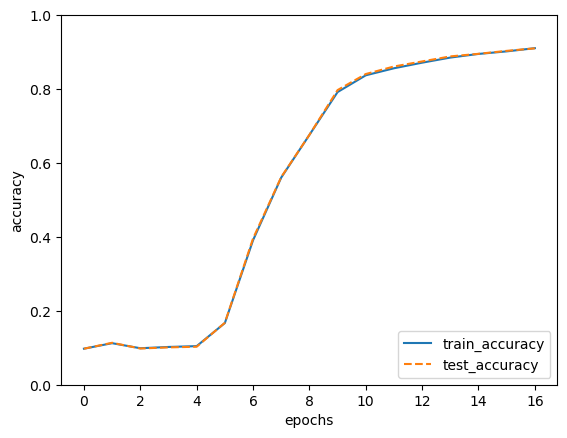

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from four_layernet import FourLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = FourLayerNet(input_size=784, hidden_size=100 ,output_size=10)

iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train_accuracy='+ str(train_acc)+ ' '+'test_accuracy=' + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train_accuracy')
plt.plot(x, test_acc_list, label='test_accuracy', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
